In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('SF data summary Interpolated.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,200.468634,5.93,55702.0,4149.6070,5.1,284589.3790,761.32167,40.30%,357406.0000,0.30%,1201,2.90,182.9
1,4/1/2005,202.308244,5.86,56203.0,4150.9246,4.7,286369.0239,765.49504,40.30%,359667.0000,0.30%,1239,3.01,182.9
2,5/1/2005,204.821172,5.72,56704.0,4152.2422,4.5,288148.6688,769.66841,40.30%,361928.0000,0.30%,1304,2.58,180.6
3,6/1/2005,207.194994,5.58,57205.0,4153.5598,4.9,289928.3137,773.84178,40.30%,364189.0000,0.30%,1345,3.00,180.6
4,7/1/2005,209.307840,5.70,57706.0,4154.8774,5.0,291707.9586,778.01515,40.23%,365445.0000,0.30%,1337,3.20,183.4
5,8/1/2005,210.714812,5.82,58207.0,4156.1950,4.8,293487.6035,782.18852,40.17%,366701.0000,0.30%,1271,3.19,183.4
6,9/1/2005,212.697917,5.77,58708.0,4157.5126,4.7,295267.2484,786.36189,40.10%,367957.0000,0.30%,2150,3.34,187.2
7,10/1/2005,214.124946,6.07,59209.0,4158.8302,4.6,297046.8933,790.53526,40.13%,370396.3333,0.30%,936,3.54,187.2
8,11/1/2005,215.514527,6.33,59710.0,4160.1478,4.7,298826.5382,794.70863,40.17%,372835.6667,0.30%,1673,3.95,183.1
9,12/1/2005,216.413650,6.27,60211.0,4161.4654,4.1,300606.1831,798.88200,40.20%,375275.0000,0.30%,1228,4.28,183.1


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,200.468634,5.93,55702.0,4149.6070,5.1,284589.3790,761.32167,357406.0,1201,2.90,182.9,40.30,0.3
1,4/1/2005,202.308244,5.86,56203.0,4150.9246,4.7,286369.0239,765.49504,359667.0,1239,3.01,182.9,40.30,0.3
2,5/1/2005,204.821172,5.72,56704.0,4152.2422,4.5,288148.6688,769.66841,361928.0,1304,2.58,180.6,40.30,0.3
3,6/1/2005,207.194994,5.58,57205.0,4153.5598,4.9,289928.3137,773.84178,364189.0,1345,3.00,180.6,40.30,0.3
4,7/1/2005,209.307840,5.70,57706.0,4154.8774,5.0,291707.9586,778.01515,365445.0,1337,3.20,183.4,40.23,0.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,55702.00,4149.60700,5.1,284589.3790,761.321670,357406.0000,1201,2.90,182.900,40.30,0.3
1,5.86,56203.00,4150.92460,4.7,286369.0239,765.495040,359667.0000,1239,3.01,182.900,40.30,0.3
2,5.72,56704.00,4152.24220,4.5,288148.6688,769.668410,361928.0000,1304,2.58,180.600,40.30,0.3
3,5.58,57205.00,4153.55980,4.9,289928.3137,773.841780,364189.0000,1345,3.00,180.600,40.30,0.3
4,5.70,57706.00,4154.87740,5.0,291707.9586,778.015150,365445.0000,1337,3.20,183.400,40.23,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,97289.75,4720.52525,3.6,548043.7140,713.518967,374949.3333,1582,4.20,235.803,34.70,0.5
150,3.81,97879.00,4721.68300,3.1,550866.1240,713.889975,375162.0000,906,4.48,237.011,34.70,0.5
151,3.90,98468.25,4722.84075,3.0,553688.5340,714.260983,375460.3333,1576,4.61,237.011,34.60,0.5
152,3.92,99057.50,4723.99850,2.9,556510.9440,714.631992,375758.6667,1372,4.82,236.108,34.50,0.5


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.912500,4.430000,5.850000,6.76000
Personal_Income,154.0,71738.123377,12040.966796,55702.0000,61960.208335,68183.541665,80937.083332,99646.75000
Resident_Population,154.0,4442.515471,190.621898,4149.6070,4280.642021,4428.088500,4630.876938,4725.15625
Unemployment_Rate,154.0,6.039610,2.257954,2.8000,4.225000,5.000000,8.200000,10.30000
GDP,154.0,382311.220907,79819.258760,284589.3790,316933.351950,350416.639900,443908.466100,559333.35400
Crime_Rate,154.0,773.719333,64.842465,659.6285,713.982727,778.179121,829.040646,875.63750
Median_Debt,154.0,387444.279221,19791.675018,357406.0000,370240.083325,376476.000000,405887.083325,421588.00000
New_Structures,154.0,848.733766,472.622402,136.0000,434.750000,801.000000,1236.250000,2358.00000
Economic_Conditions_Index,154.0,3.108052,3.370036,-9.4500,2.282500,4.245000,5.242500,7.04000
CPI all items less shelter,154.0,214.132597,16.378875,180.6000,200.776000,217.875000,229.137000,237.10700


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.331797,-1.536594,-0.416134,-1.224289,-0.191197,-1.517723,0.745344,-0.061736,-1.906883,0.781886,-1.047499
1,1.051011,-1.290189,-1.529682,-0.593285,-1.201993,-0.126835,-1.403483,0.825746,-0.029095,-1.906883,0.781886,-1.047499
2,0.916107,-1.248581,-1.522770,-0.681861,-1.179697,-0.062473,-1.289243,0.963277,-0.156690,-2.047308,0.781886,-1.047499
3,0.781203,-1.206973,-1.515858,-0.504709,-1.157401,0.001888,-1.175003,1.050027,-0.032063,-2.047308,0.781886,-1.047499
4,0.896835,-1.165365,-1.508946,-0.460421,-1.135105,0.066250,-1.111542,1.033100,0.027284,-1.876356,0.751944,-1.047499
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,2.122058,1.458436,-1.080452,2.076347,-0.928410,-0.631323,1.551484,0.324017,1.323070,-1.613490,-0.962372
150,-0.924366,2.170995,1.464509,-1.301891,2.111707,-0.922688,-0.620578,0.121167,0.407102,1.396824,-1.613490,-0.962372
151,-0.837642,2.219932,1.470583,-1.346179,2.147067,-0.916966,-0.605504,1.538789,0.445677,1.396824,-1.656265,-0.962372
152,-0.818370,2.268869,1.476656,-1.390467,2.182427,-0.911245,-0.590431,1.107155,0.507991,1.341692,-1.699040,-0.962372


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

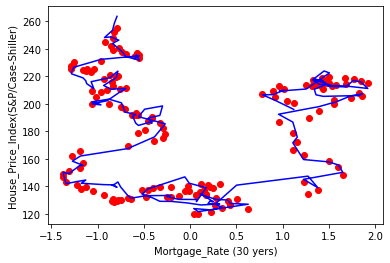

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 4.55
Accuracy: 97.29 %.


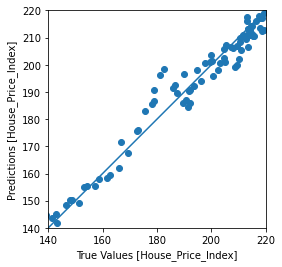

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9771722852166146

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,3.175047
1,35.411150
2,-46.641828
3,3.174423
4,34.224863
5,13.277948
6,-0.866242
7,0.855968
8,8.615636
9,-24.409045


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[196.00897291 198.25219628 202.65843606 206.61016529 206.79358959
 209.99496553 209.36544763 210.84380933 222.57029681 223.96939476
 217.98983905 217.21957311 212.81200709 212.38877743 217.09093542
 216.08680486 211.25937545 212.98495159 213.33239037 213.23334993
 216.00107355 217.59166417 214.16102793 214.10634742 210.64583406
 206.60842549 205.50645193 206.08857688 207.36388747 205.84764338
 200.82392978 201.11083297 197.96624206 196.69059285 192.48275003
 186.75901155 175.8324054  171.67996741 159.51356981 157.82509042
 155.58442496 150.21851703 145.11023785 139.0276674  147.43015175
 140.87063246 127.10021167 124.60494069 122.84926803 123.82240066
 121.61324649 126.98194149 127.53513328 130.06815467 130.46679079
 132.76604597 134.33956395 132.85107944 128.73497431 129.21025668
 127.36819299 127.16191082 126.44294088 127.90522187 129.04437702
 129.11382304 131.56961875 134.38797371 138.1996247  146.89792667
 142.26826565 138.98040599 128.90200001 130.43165873 130.52304647
 132.55488

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,196.008973
1,198.252196
2,202.658436
3,206.610165
4,206.793590
...,...
149,248.796667
150,248.297329
151,253.612007
152,258.679862


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.331797,-1.290189,-1.248581,-1.206973,-1.165365,-1.123757,-1.082149,-1.040541,-0.998933,-0.957325,...,1.877372,1.926309,1.975246,2.024184,2.073121,2.122058,2.170995,2.219932,2.268869,2.317806
Resident_Population,-1.536594,-1.529682,-1.522770,-1.515858,-1.508946,-1.502033,-1.495121,-1.488209,-1.481297,-1.474385,...,1.428068,1.434142,1.440215,1.446289,1.452362,1.458436,1.464509,1.470583,1.476656,1.482730
Unemployment_Rate,-0.416134,-0.593285,-0.681861,-0.504709,-0.460421,-0.548997,-0.593285,-0.637573,-0.593285,-0.859012,...,-1.169028,-1.257603,-1.301891,-1.124740,-1.036164,-1.080452,-1.301891,-1.346179,-1.390467,-1.434755
GDP,-1.224289,-1.201993,-1.179697,-1.157401,-1.135105,-1.112809,-1.090513,-1.068217,-1.045922,-1.023626,...,1.899547,1.934907,1.970267,2.005627,2.040987,2.076347,2.111707,2.147067,2.182427,2.217787
Crime_Rate,-0.191197,-0.126835,-0.062473,0.001888,0.066250,0.130612,0.194973,0.259335,0.323697,0.388058,...,-0.957018,-0.951296,-0.945575,-0.939853,-0.934131,-0.928410,-0.922688,-0.916966,-0.911245,-0.905523
Median_Debt,-1.517723,-1.403483,-1.289243,-1.175003,-1.111542,-1.048081,-0.984620,-0.861370,-0.738119,-0.614869,...,-0.636746,-0.642102,-0.647458,-0.652814,-0.642069,-0.631323,-0.620578,-0.605504,-0.590431,-0.575357
New_Structures,0.745344,0.825746,0.963277,1.050027,1.033100,0.893454,2.753289,0.184643,1.744027,0.802472,...,0.326405,1.259496,1.073301,3.193387,1.181210,1.551484,0.121167,1.538789,1.107155,2.444375
Economic_Conditions_Index,-0.061736,-0.029095,-0.156690,-0.032063,0.027284,0.024317,0.068827,0.128173,0.249834,0.347755,...,0.424906,0.288409,0.418971,0.478318,0.353690,0.324017,0.407102,0.445677,0.507991,0.546566
CPI all items less shelter,-1.906883,-1.906883,-2.047308,-2.047308,-1.876356,-1.876356,-1.644350,-1.644350,-1.894672,-1.894672,...,1.364465,1.364465,1.402685,1.402685,1.323070,1.323070,1.396824,1.396824,1.341692,1.341692


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.331797,-1.290189,-1.248581,-1.206973,-1.165365,-1.123757,-1.082149,-1.040541,-0.998933,...,1.877372,1.926309,1.975246,2.024184,2.073121,2.122058,2.170995,2.219932,2.268869,2.317806
2,Resident_Population,-1.536594,-1.529682,-1.522770,-1.515858,-1.508946,-1.502033,-1.495121,-1.488209,-1.481297,...,1.428068,1.434142,1.440215,1.446289,1.452362,1.458436,1.464509,1.470583,1.476656,1.482730
3,Unemployment_Rate,-0.416134,-0.593285,-0.681861,-0.504709,-0.460421,-0.548997,-0.593285,-0.637573,-0.593285,...,-1.169028,-1.257603,-1.301891,-1.124740,-1.036164,-1.080452,-1.301891,-1.346179,-1.390467,-1.434755
4,GDP,-1.224289,-1.201993,-1.179697,-1.157401,-1.135105,-1.112809,-1.090513,-1.068217,-1.045922,...,1.899547,1.934907,1.970267,2.005627,2.040987,2.076347,2.111707,2.147067,2.182427,2.217787
5,Crime_Rate,-0.191197,-0.126835,-0.062473,0.001888,0.066250,0.130612,0.194973,0.259335,0.323697,...,-0.957018,-0.951296,-0.945575,-0.939853,-0.934131,-0.928410,-0.922688,-0.916966,-0.911245,-0.905523
6,Median_Debt,-1.517723,-1.403483,-1.289243,-1.175003,-1.111542,-1.048081,-0.984620,-0.861370,-0.738119,...,-0.636746,-0.642102,-0.647458,-0.652814,-0.642069,-0.631323,-0.620578,-0.605504,-0.590431,-0.575357
7,New_Structures,0.745344,0.825746,0.963277,1.050027,1.033100,0.893454,2.753289,0.184643,1.744027,...,0.326405,1.259496,1.073301,3.193387,1.181210,1.551484,0.121167,1.538789,1.107155,2.444375
8,Economic_Conditions_Index,-0.061736,-0.029095,-0.156690,-0.032063,0.027284,0.024317,0.068827,0.128173,0.249834,...,0.424906,0.288409,0.418971,0.478318,0.353690,0.324017,0.407102,0.445677,0.507991,0.546566
9,CPI all items less shelter,-1.906883,-1.906883,-2.047308,-2.047308,-1.876356,-1.876356,-1.644350,-1.644350,-1.894672,...,1.364465,1.364465,1.402685,1.402685,1.323070,1.323070,1.396824,1.396824,1.341692,1.341692


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),3.175047
1,Personal_Income,35.411150
2,Resident_Population,-46.641828
3,Unemployment_Rate,3.174423
4,GDP,34.224863
5,Crime_Rate,13.277948
6,Median_Debt,-0.866242
7,New_Structures,0.855968
8,Economic_Conditions_Index,8.615636
9,CPI all items less shelter,-24.409045


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

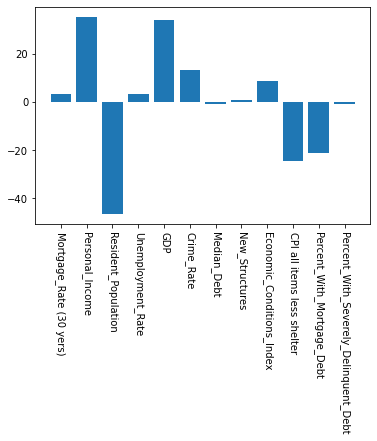

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2018,258.569765,4.03,100236.0000,4726.314000,3.1,562155.7640,712.993958,34.53%,375355.6667,0.50%,933,5.02,240.742
1,2/1/2018,260.248492,4.33,100626.4167,4726.771417,3.0,564638.2383,710.984917,34.67%,374654.3333,0.50%,1366,4.95,240.742
2,3/1/2018,261.822888,4.44,101016.8333,4727.228833,2.9,567120.7127,708.975875,34.80%,373953.0000,0.50%,2049,4.13,242.950
3,4/1/2018,261.714329,4.47,101407.2500,4727.686250,2.6,569603.1870,706.966833,34.67%,373714.3333,0.47%,1783,4.11,242.950
4,5/1/2018,263.664436,4.59,101797.6667,4728.143667,2.4,572085.6613,704.957792,34.53%,373475.6667,0.43%,1127,4.13,244.644
5,6/1/2018,264.833339,4.57,102188.0833,4728.601083,3.0,574568.1357,702.948750,34.40%,373237.0000,0.40%,1070,4.19,244.644
6,7/1/2018,266.780509,4.53,102578.5000,4729.058500,3.0,577050.6100,700.939708,34.43%,373497.0000,0.40%,996,4.13,245.933
7,8/1/2018,267.559797,4.55,102968.9167,4729.515917,2.9,579533.0843,698.930667,34.47%,373757.0000,0.40%,1736,3.70,245.933
8,9/1/2018,268.832899,4.63,103359.3333,4729.973333,2.6,582015.5587,696.921625,34.50%,374017.0000,0.40%,742,3.42,248.281
9,10/1/2018,267.767739,4.83,103749.7500,4730.430750,2.7,584498.0330,694.912583,34.30%,374294.3333,0.40%,1262,3.45,248.281


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2018,258.569765,4.03,100236.0000,4726.314000,3.1,562155.7640,712.993958,375355.6667,933,5.02,240.742,34.53,0.50
1,2/1/2018,260.248492,4.33,100626.4167,4726.771417,3.0,564638.2383,710.984917,374654.3333,1366,4.95,240.742,34.67,0.50
2,3/1/2018,261.822888,4.44,101016.8333,4727.228833,2.9,567120.7127,708.975875,373953.0000,2049,4.13,242.950,34.80,0.50
3,4/1/2018,261.714329,4.47,101407.2500,4727.686250,2.6,569603.1870,706.966833,373714.3333,1783,4.11,242.950,34.67,0.47
4,5/1/2018,263.664436,4.59,101797.6667,4728.143667,2.4,572085.6613,704.957792,373475.6667,1127,4.13,244.644,34.53,0.43


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,100236.0000,4726.314000,3.1,562155.7640,712.993958,375355.6667,933,5.02,240.742,34.53,0.50
1,4.33,100626.4167,4726.771417,3.0,564638.2383,710.984917,374654.3333,1366,4.95,240.742,34.67,0.50
2,4.44,101016.8333,4727.228833,2.9,567120.7127,708.975875,373953.0000,2049,4.13,242.950,34.80,0.50
3,4.47,101407.2500,4727.686250,2.6,569603.1870,706.966833,373714.3333,1783,4.11,242.950,34.67,0.47
4,4.59,101797.6667,4728.143667,2.4,572085.6613,704.957792,373475.6667,1127,4.13,244.644,34.53,0.43
5,4.57,102188.0833,4728.601083,3.0,574568.1357,702.948750,373237.0000,1070,4.19,244.644,34.40,0.40
6,4.53,102578.5000,4729.058500,3.0,577050.6100,700.939708,373497.0000,996,4.13,245.933,34.43,0.40
7,4.55,102968.9167,4729.515917,2.9,579533.0843,698.930667,373757.0000,1736,3.70,245.933,34.47,0.40
8,4.63,103359.3333,4729.973333,2.6,582015.5587,696.921625,374017.0000,742,3.42,248.281,34.50,0.40
9,4.83,103749.7500,4730.430750,2.7,584498.0330,694.912583,374294.3333,1262,3.45,248.281,34.30,0.40


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000,0.220289,4.0300,4.462500,4.560000,4.632500,4.870000
Personal_Income,12.0,102383.291667,1407.667307,100236.0000,101309.645825,102383.291650,103456.937475,104530.583300
Resident_Population,12.0,4728.829792,1.649239,4726.3140,4727.571896,4728.829792,4730.087687,4731.345583
Unemployment_Rate,12.0,2.791667,0.219331,2.4000,2.600000,2.800000,3.000000,3.100000
GDP,12.0,575809.372833,8950.688502,562155.7640,568982.568425,575809.372850,582636.177275,589462.981700
Crime_Rate,12.0,701.944229,7.243703,690.8945,696.419365,701.944229,707.469094,712.993958
Median_Debt,12.0,374114.666667,639.296113,373237.0000,373659.999975,373985.000000,374592.333350,375355.666700
New_Structures,12.0,1396.750000,632.554292,742.0000,980.250000,1194.500000,1747.750000,2921.000000
Economic_Conditions_Index,12.0,3.968333,0.612800,3.0000,3.442500,4.120000,4.145000,5.020000
CPI all items less shelter,12.0,245.081500,2.786106,240.7420,242.950000,245.288500,247.939000,248.281000


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,2.366743,1.488803,-1.301891,2.253147,-0.936506,-0.610793,0.178295,0.567338,1.624617,-1.686207,-0.962372
1,-0.423295,2.399167,1.491203,-1.346179,2.284248,-0.967490,-0.646229,1.094460,0.546566,1.624617,-1.626323,-0.962372
2,-0.317299,2.431591,1.493603,-1.390467,2.315350,-0.998473,-0.681664,2.539588,0.303245,1.759425,-1.570716,-0.962372
3,-0.288391,2.464015,1.496002,-1.523331,2.346451,-1.029457,-0.693723,1.976771,0.297311,1.759425,-1.626323,-0.975141
4,-0.172759,2.496439,1.498402,-1.611906,2.377552,-1.060440,-0.705782,0.588771,0.303245,1.862851,-1.686207,-0.992167
5,-0.192031,2.528863,1.500801,-1.346179,2.408653,-1.091423,-0.717841,0.468167,0.321049,1.862851,-1.741814,-1.004936
6,-0.230575,2.561287,1.503201,-1.346179,2.439754,-1.122407,-0.704704,0.311594,0.303245,1.941550,-1.728982,-1.004936
7,-0.211303,2.593711,1.505601,-1.390467,2.470856,-1.153390,-0.691568,1.877326,0.175650,1.941550,-1.711872,-1.004936
8,-0.134215,2.626135,1.508000,-1.523331,2.501957,-1.184374,-0.678431,-0.225833,0.092565,2.084905,-1.699040,-1.004936
9,0.058504,2.658559,1.510400,-1.479043,2.533058,-1.215357,-0.664418,0.874411,0.101467,2.084905,-1.784589,-1.004936


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[256.83633492 258.66288704 255.24411835 257.27493421 256.68728364
 260.41346591 259.48720132 260.96206125 256.17431226 261.44517724
 264.40296674 270.22755346]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,256.836335
1,258.662887
2,255.244118
3,257.274934
4,256.687284
5,260.413466
6,259.487201
7,260.962061
8,256.174312
9,261.445177
